## 목차
### 0. [딥러닝 패키지 간략소개](#content-0)
<br/>

### 1. [회귀 (Regression)](#content-1)
#### 1-1.[케라스로 선형회귀 나타내기](#content-1-1)
- (참고) [scikit-learn을 사용한 선형회귀](#content-1-1-ref)

#### 1-2 [선형회귀로 사인그래프를 나타낼 수 있을까?](#content-1-2)
- (참고) [weight 초기화의 중요성](#content-1-2-ref)

#### 1-3 [케라스에서 과적합 잡기](#content-1-3)

<br/>

### 2. [분류 (Classification)](#content-2)
#### 2-1 [케라스로 로지스틱회귀 나타내기](#content-2-1)
- (참고) [scikit-learn을 사용한 로지스틱회귀](#content-2-1-ref)

#### 2-2 [로지스틱 회귀로 도넛모양을 나타낼 수 있을까?](#content-2-2)

<br/>

### <a name='content-0'> 0. 딥러닝 패키지 간략소개</a>
- TensorFlow (텐서플로우) : 구글이 개발하고 사용하는 딥러닝 패키지
  - low level 언어 : 행렬의 모양, 행렬의 연산 등까지 직접 조작할 수 있을 정도로 세세한 작업이 가능
  - 주 사용용도 : 논문 구현, 서비스 개발 등에 사용됨
  
- Keras (케라스) : 텐서플로우의 highwrapper 딥러닝 패키지
  - 텐서플로우 언어 기반으로 딥러닝 개발을 더 쉽게 할 수 있도록 만든 딥러닝 패키지
  - 주 사용용도 : 빠른 실험(연구용)

- PyTorch (파이토치) : 기존 딥러닝 프레임웍 Torch를 파이썬스럽게 만든 패키지
  - middle level 언어 : TF와 Keras 중간 정도의 편리함을 제공, 하지만 TF 처럼 세세한 작업도 가능
  - python numpy와 호환이 굉징히 잘 된다.
  - 주 사용용도 : 논문 구현,

- fast.ai (페트스 에이아이) : 파이토치의 highwrapper 딥러닝 패키지
  - keras 와 마찬가지로 단 몇 줄만으로 딥러닝 실행가능
  - 주 사용용도 : 빠른 실험(연구용)

### <a name='content-1'> 1. 회귀 (Regression) </a>
#### <a name='content-1-1'> 1-1 케라스로 선형회귀 나타내기 </a>
수업시간에 배운 구현 방법 : 정규방정식 (Normal equation)
- $\mathbf{b} = (X^TX)^{-1}X^T\mathbf{y}$
- $X=
\begin{bmatrix}
1 & x_1^{(1)} & x_2^{(1)} & \cdots & x_d^{(1)} \\
1 & x_1^{(2)} & x_2^{(2)} & \cdots & x_d^{(2)} \\
1 & \vdots & \vdots & \ddots & \vdots \\
1 & x_1^{(N)} & x_2^{(N)} & \cdots & x_d^{(N)} \\
\end{bmatrix}$
,
$y=
\begin{bmatrix}
y^{(1)}\\ y^{(2)}\\ \vdots \\ y^{(N)}
\end{bmatrix}$
<br/><br/>

선형회귀를 사용하고 싶을 때마다 구현하는 것은 번거로움
- 누군가 잘 만들어놓은 패키지를 사용하자.
- Keras, Scikit-learn, ...

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [ ]:
# 선형회귀를 위한 인위 데이터 만들기
x = np.linspace(-1, 1, 9)
y = 4*x + 2 + 0.5 * np.random.randn(len(x))

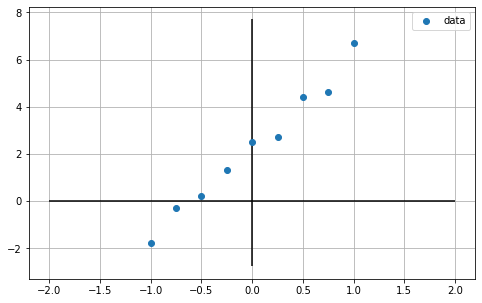

In [ ]:
plt.figure(figsize = (8,5))
# 데이터 그리기
plt.plot(x, y, 'o', label = 'data')

# x축 y축 그리기
plt.vlines(x = 0,  ymin = y.min()-1, ymax = y.max()+1)
plt.hlines(y = 0,  xmin = x.min()-1, xmax = x.max()+1)
plt.grid()

# 범례 보여주기
plt.legend()

# 보여주기
plt.show()

---

**케라스로 딥러닝 만드는 세 가지 단계**
1. 모델 정의
1. 모델 컴파일
1. 모델 훈련

**하나하나 알아보기**

모델 정의
- Sequential 인지? Functional 인지?
  - Sequential : 모델을 쌓은 순서대로 인풋이 흘러감
  - Functional : 입력값이 중간에 나뉘어지거나 합쳐지는 등의 과정이 있을 때 사용(고급 스킬)
- 레이어 쌓기 : `model.add()`로 원하는 레이어를 쌓아올림

모델 컴파일
  - 손실 함수 ex) binary_crossentropy, mean-squared-error, mean-absolute-error
  - 최적화 알고리즘, ex) Adam, SGD, RMSprop
  - 평가지표, ex) accuracy, mean-absolute-error

모델 학습
  - 데이터
  - 에폭 횟수
  - 배치 사이즈
  - 등등

In [ ]:
###############################################################
# 케라스로 선형회귀 구현하기                                  #
###############################################################
# 모델 정의
model = Sequential()
model.add(Dense(1, input_shape = (1,)))

# 모델 컴파일
model.compile(loss = 'mean_squared_error', optimizer = 'sgd')

# 모델 훈련
model.fit(x, y, epochs = 500, verbose = 0)

###############################################################
#                                                             #
###############################################################

**훈련시킨 모델에 새로운 입력값을 넣었을 때 어떤 예측 값을 내는지 확인하기**<br/>
새로운 입력값 : -1에서 1까지 50등분

In [ ]:
x_test = np.linspace(-1,1,50)
y_pred = model.predict(x_test)

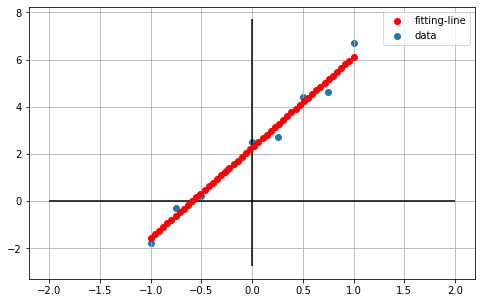

In [ ]:
plt.figure(figsize = (8,5))
# 데이터 그리기
plt.scatter(x, y, label = 'data')
plt.plot(x_test, y_pred, 'ro', label = 'fitting-line')


# x축 y축 그리기
plt.vlines(x = 0,  ymin = y.min()-1, ymax = y.max()+1)
plt.hlines(y = 0,  xmin = x.min()-1, xmax = x.max()+1)
plt.grid()

# 범례 보여주기
plt.legend()

# 보여주기
plt.show()

#### <a name='content-1-1-ref'> (참고) Scikit-learn을 사용한 선형회귀 </a>
scikit-learn은 선형회귀, 로지스틱 회귀, SVM 등등 머신러닝 알고리즘을 담고 있는 패키지입니다.

In [ ]:
###############################################################
# Scikit learn 선형회귀 모듈 사용하기                         #
###############################################################
# 모듈 불러오기
from sklearn.linear_model import LinearRegression

# 모델 정의
LR = LinearRegression()

# 모델 훈련
LR.fit(x, reshape(-1,1), y)

# 모델 예측
x_test = np.linspace(-1,1,50)

###############################################################
#                                                             #
###############################################################

NameError: ignored

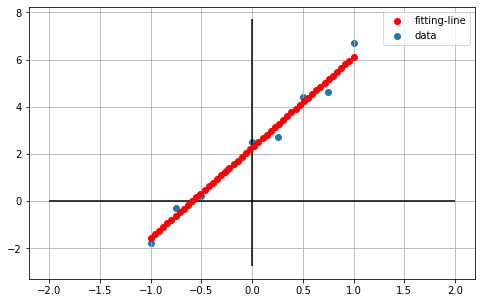

In [ ]:
plt.figure(figsize = (8,5))
# 데이터 그리기
plt.scatter(x, y, label = 'data')
plt.plot(x_test, y_pred, 'ro', label = 'fitting-line')


# x축 y축 그리기
plt.vlines(x = 0,  ymin = y.min()-1, ymax = y.max()+1)
plt.hlines(y = 0,  xmin = x.min()-1, xmax = x.max()+1)
plt.grid()

# 범례 보여주기
plt.legend()

# 보여주기
plt.show()

#### <a name='content-1-2'> 1-2. 선형회귀로 사인그래프를 나타낼 수 있을까? </a>

In [ ]:
# 사인그래프 만들기
x = np.linspace(-1, 1, 20)
y = np.sin(np.pi * x)

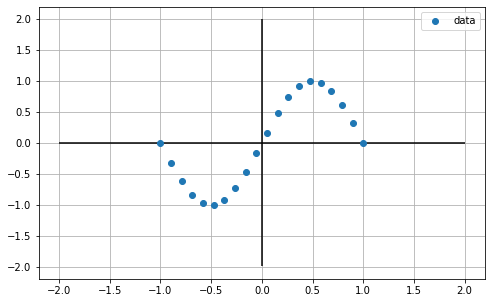

In [ ]:
plt.figure(figsize = (8,5))
# 데이터 그리기
plt.plot(x, y, 'o', label = 'data')

# x축 y축 그리기
plt.vlines(x = 0,  ymin = y.min()-1, ymax = y.max()+1)
plt.hlines(y = 0,  xmin = x.min()-1, xmax = x.max()+1)
plt.grid()

# 범례 보여주기
plt.legend()

# 보여주기
plt.show()

In [ ]:
###############################################################
# 케라스로 선형회귀 구현하기                                  #
###############################################################
# 모델 정의
model = Sequential()
model.add(Dense(1, input_shape = (1,)))

# 모델 컴파일
model.compile(loss = 'mean_squared_error', optimizer = 'sgd')

# 모델 훈련
model.fit(x, y, epochs = 500, verbose = 0)

###############################################################
#                                                             #
###############################################################

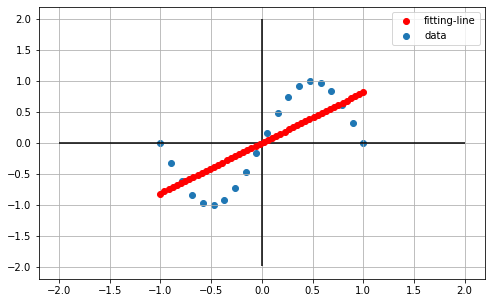

In [ ]:
x_test = np.linspace(-1,1,50)
y_pred = model.predict(x_test)

plt.figure(figsize = (8,5))
# 데이터 그리기
plt.scatter(x, y, label = 'data')
plt.plot(x_test, y_pred, 'ro', label = 'fitting-line')


# x축 y축 그리기
plt.vlines(x = 0,  ymin = y.min()-1, ymax = y.max()+1)
plt.hlines(y = 0,  xmin = x.min()-1, xmax = x.max()+1)
plt.grid()

# 범례 보여주기
plt.legend()

# 보여주기
plt.show()

In [ ]:
model = Sequential()
###############################################################
# 아래에 모델을 쌓아서 사인 그래프를 적합하시오.              #
###############################################################

model.add(Dense(256, input_shape = (1,), activation = 'relu'))
model.add(Dense(256, activation = 'relu', kernel_initializer = 'he_normal'))
model.add(Dense(256, activation = 'relu', kernel_initializer = 'he_normal'))
model.add(Dense(256, activation = 'relu', kernel_initializer = 'he_normal'))
model.add(Dense(256, activation = 'relu', kernel_initializer = 'he_normal'))
model.add(Dense(256, activation = 'relu', kernel_initializer = 'he_normal'))
model.add((Dense(1)))



###############################################################
#                                                             #
###############################################################
model.compile(loss = 'mean_squared_error', optimizer = 'sgd', metrics = ['mean_squared_error'])
model.fit(x,y, epochs = 500, verbose = 0, batch_size = 9)

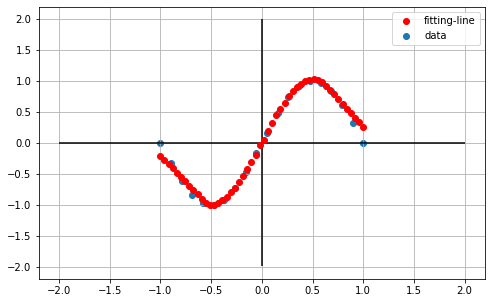

In [ ]:
x_test = np.linspace(-1,1,50)
y_pred = model.predict(x_test)

plt.figure(figsize = (8,5))
# 데이터 그리기
plt.scatter(x, y, label = 'data')
plt.plot(x_test, y_pred, 'ro', label = 'fitting-line')


# x축 y축 그리기
plt.vlines(x = 0,  ymin = y.min()-1, ymax = y.max()+1)
plt.hlines(y = 0,  xmin = x.min()-1, xmax = x.max()+1)
plt.grid()

# 범례 보여주기
plt.legend()

# 보여주기
plt.show()

#### <a name='content-1-2-ref'> (참고) weight 초기화의 중요성 </a>

In [ ]:
model = Sequential()
model.add(Dense(128, activation = 'relu', input_shape = (1,)))
model.add(Dense(128, activation = 'relu', kernel_initializer='he_normal'))
model.add(Dense(128, activation = 'relu', kernel_initializer='he_normal'))
model.add(Dense(128, activation = 'relu', kernel_initializer='he_normal'))
model.add(Dense(1))

model.compile(loss = 'mean_squared_error', optimizer = 'sgd', metrics = ['mean_squared_error'])

model.fit(x,y, epochs = 500, verbose = 0, batch_size = 9)

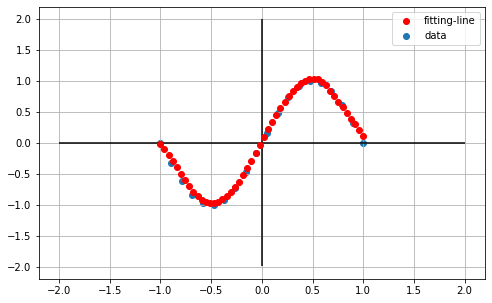

In [ ]:
x_test = np.linspace(-1,1,50)
y_pred = model.predict(x_test)

plt.figure(figsize = (8,5))
# 데이터 그리기
plt.scatter(x, y, label = 'data')
plt.plot(x_test, y_pred, 'ro', label = 'fitting-line')


# x축 y축 그리기
plt.vlines(x = 0,  ymin = y.min()-1, ymax = y.max()+1)
plt.hlines(y = 0,  xmin = x.min()-1, xmax = x.max()+1)
plt.grid()

# 범례 보여주기
plt.legend()

# 보여주기
plt.show()

#### <a name='content-1-3'> 1-3 케라스에서 과적합 잡기 </a>

In [ ]:
x = np.linspace(-1,1,12)
y = x ** 2 + 0.10 * np.random.randn(len(x))

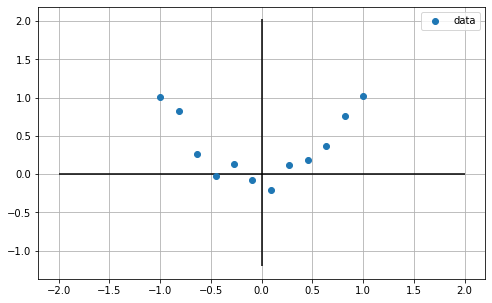

In [ ]:
plt.figure(figsize = (8,5))
# 데이터 그리기
plt.plot(x, y, 'o', label = 'data')

# x축 y축 그리기
plt.vlines(x = 0,  ymin = y.min()-1, ymax = y.max()+1)
plt.hlines(y = 0,  xmin = x.min()-1, xmax = x.max()+1)
plt.grid()

# 범례 보여주기
plt.legend()

# 보여주기
plt.show()

In [ ]:
model = Sequential()
model.add(Dense(256, activation = 'relu', input_shape = (1,)))
model.add(Dense(256, activation = 'relu', kernel_initializer='he_normal'))
model.add(Dense(256, activation = 'relu', kernel_initializer='he_normal'))
model.add(Dense(256, activation = 'relu', kernel_initializer='he_normal'))
model.add(Dense(256, activation = 'relu', kernel_initializer='he_normal'))
model.add(Dense(256, activation = 'relu', kernel_initializer='he_normal'))
model.add(Dense(256, activation = 'relu', kernel_initializer='he_normal'))

model.add(Dense(1))

model.compile(loss = 'mean_squared_error', optimizer = 'sgd', metrics = ['mean_squared_error'])

model.fit(x,y, epochs = 500, verbose = 0, batch_size = 9)

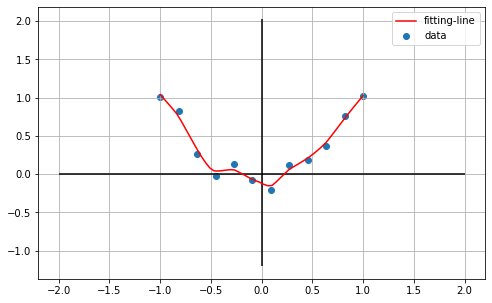

In [ ]:
x_test = np.linspace(-1,1,50)
y_pred = model.predict(x_test)

plt.figure(figsize = (8,5))
# 데이터 그리기
plt.scatter(x, y, label = 'data')
plt.plot(x_test, y_pred, 'r-', label = 'fitting-line')


# x축 y축 그리기
plt.vlines(x = 0,  ymin = y.min()-1, ymax = y.max()+1)
plt.hlines(y = 0,  xmin = x.min()-1, xmax = x.max()+1)
plt.grid()

# 범례 보여주기
plt.legend()

# 보여주기
plt.show()

In [ ]:
from keras.layers import Dropout

model = Sequential()
model.add(Dense(256, activation = 'relu', input_shape = (1,)))
model.add(Dense(256, activation = 'relu', kernel_initializer='he_normal'))
model.add(Dense(256, activation = 'relu', kernel_initializer='he_normal'))
model.add(Dense(256, activation = 'relu', kernel_initializer='he_normal'))
model.add(Dropout(0.3))
model.add(Dense(256, activation = 'relu', kernel_initializer='he_normal'))
model.add(Dropout(0.3))
model.add(Dense(256, activation = 'relu', kernel_initializer='he_normal'))
model.add(Dropout(0.3))
model.add(Dense(256, activation = 'relu', kernel_initializer='he_normal'))

model.add(Dense(1))

model.compile(loss = 'mean_squared_error', optimizer = 'sgd', metrics = ['mean_squared_error'])

model.fit(x,y, epochs = 500, verbose = 0, batch_size = 9)


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


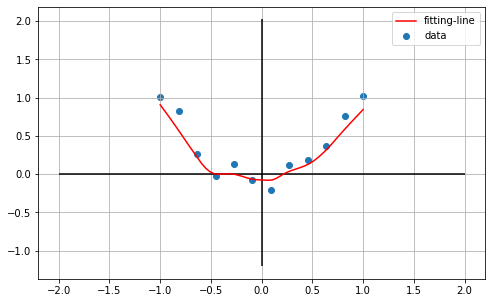

In [ ]:
x_test = np.linspace(-1,1,50)
y_pred = model.predict(x_test)

plt.figure(figsize = (8,5))
# 데이터 그리기
plt.scatter(x, y, label = 'data')
plt.plot(x_test, y_pred, 'r-', label = 'fitting-line')


# x축 y축 그리기
plt.vlines(x = 0,  ymin = y.min()-1, ymax = y.max()+1)
plt.hlines(y = 0,  xmin = x.min()-1, xmax = x.max()+1)
plt.grid()

# 범례 보여주기
plt.legend()

# 보여주기
plt.show()

### <a name='content-2'> 2. 분류 (Classification) </a>
#### <a name='content-2-1'> 2-1 케라스로 로지스틱회귀 나타내기 </a>

In [ ]:
x = np.linspace(-1,1,50)
y = np.linspace(-1,1,50)

X = []
for i in x:
  for j in y:
    if i+j <= 0:
      X.append([i, j, 0])
    else:
      X.append([i, j, 1])
X = np.array(X)

In [ ]:
plt.figure(figsize = (8,8))

# 데이터 그리기
sns.scatterplot(x = X[:,0], y = X[:,1], hue = X[:,2])

# x축 y축 그리기
plt.vlines(x = 0,  ymin = -3, ymax = 3)
plt.hlines(y = 0,  xmin = -3, xmax = 3)
plt.grid()

plt.show()

In [ ]:
###############################################################
# 케라스로 로지스틱회귀 구현하기               ]              #
###############################################################
# 모델 정의

# 모델 컴파일

# 모델 훈련

###############################################################
#                                                             #
###############################################################

In [ ]:
#######################################
# 테스트 데이터 만들기 & 예측하기
#######################################
x_test = []
for i in x:
  for j in y:
    x_test.append([i,j])
x_test = np.array(x_test)
y_pred = model.predict_classes(x_test)

#######################################
# 그림그리기
#######################################
plt.figure(figsize = (15,5))

plt.subplot(131)
sns.scatterplot(x = x_test[:,0], y = x_test[:,1])
plt.vlines(x = 0,  ymin = -3, ymax = 3)
plt.hlines(y = 0,  xmin = -3, xmax = 3)
plt.title("test data")
plt.grid()

plt.subplot(132)
sns.scatterplot(x = X[:,0], y = X[:,1], hue = X[:,2])
plt.vlines(x = 0,  ymin = -3, ymax = 3)
plt.hlines(y = 0,  xmin = -3, xmax = 3)
plt.title("original data")
plt.grid()

plt.subplot(133)
sns.scatterplot(x = x_test[:,0], y = x_test[:,1], hue = y_pred.reshape(-1))
plt.vlines(x = 0,  ymin = -3, ymax = 3)
plt.hlines(y = 0,  xmin = -3, xmax = 3)
plt.title("prediction")
plt.grid()

plt.tight_layout()

plt.show()

#### <a name='content-2-1-ref'> (참고) Scikit-learn을 사용한 로지스틱회귀 </a>
scikit-learn은 선형회귀, 로지스틱 회귀, SVM 등등 머신러닝 알고리즘을 담고 있는 패키지입니다.

In [ ]:
###############################################################
# Scikit learn 선형회귀 모듈 사용하기                         #
###############################################################
# 모듈 불러오기

# 모델 정의

# 모델 훈련

# 모델 예측
x_test = np.linspace(-1,1,50)

###############################################################
#                                                             #
###############################################################

In [ ]:
#######################################
# 테스트 데이터 만들기 & 예측하기
#######################################
x_test = []
for i in x:
  for j in y:
    x_test.append([i,j])
x_test = np.array(x_test)
y_pred = LR.predict(x_test)

#######################################
# 그림그리기
#######################################
plt.figure(figsize = (15,5))

plt.subplot(131)
sns.scatterplot(x = x_test[:,0], y = x_test[:,1])
plt.vlines(x = 0,  ymin = -3, ymax = 3)
plt.hlines(y = 0,  xmin = -3, xmax = 3)
plt.title("test data")
plt.grid()

plt.subplot(132)
sns.scatterplot(x = X[:,0], y = X[:,1], hue = X[:,2])
plt.vlines(x = 0,  ymin = -3, ymax = 3)
plt.hlines(y = 0,  xmin = -3, xmax = 3)
plt.title("original data")
plt.grid()

plt.subplot(133)
sns.scatterplot(x = x_test[:,0], y = x_test[:,1], hue = y_pred.reshape(-1))
plt.vlines(x = 0,  ymin = -3, ymax = 3)
plt.hlines(y = 0,  xmin = -3, xmax = 3)
plt.title("prediction")
plt.grid()

plt.tight_layout()

plt.show()

#### <a name='content-2-2'> 2-2 로지스틱회귀로 도넛모양을 나타낼 수 있을까? </a>

In [ ]:
x = np.linspace(-2,2,100)
y = np.linspace(-2,2,100)

X = []
for i in x:
  for j in y:
    if i**2 + j**2 <= 1:
      X.append([i,j,0])
    elif i**2 + j**2 <= 4:
      X.append([i,j,1])

X = np.array(X)

In [ ]:
plt.figure(figsize = (8,8))

# 데이터 그리기
sns.scatterplot(x = X[:,0], y = X[:,1], hue = X[:,2])

# x축 y축 그리기
plt.vlines(x = 0,  ymin = -3, ymax = 3)
plt.hlines(y = 0,  xmin = -3, xmax = 3)
plt.grid()

plt.show()

In [ ]:
###############################################################
# 케라스로 로지스틱회귀 구현하기               ]              #
###############################################################
# 모델 정의

# 모델 컴파일

# 모델 훈련

###############################################################
#                                                             #
###############################################################

In [ ]:
#######################################
# 테스트 데이터 만들기 & 예측하기
#######################################
x_test = []
for i in x:
  for j in y:
    if i**2 + j**2 <= 4:
      x_test.append([i,j])
x_test = np.array(x_test)
y_pred = model.predict_classes(x_test)

#######################################
# 그림그리기
#######################################
plt.figure(figsize = (15,5))

plt.subplot(131)
sns.scatterplot(x = x_test[:,0], y = x_test[:,1])
plt.vlines(x = 0,  ymin = -3, ymax = 3)
plt.hlines(y = 0,  xmin = -3, xmax = 3)
plt.title("test data")
plt.grid()

plt.subplot(132)
sns.scatterplot(x = X[:,0], y = X[:,1], hue = X[:,2])
plt.vlines(x = 0,  ymin = -3, ymax = 3)
plt.hlines(y = 0,  xmin = -3, xmax = 3)
plt.title("original data")
plt.grid()

plt.subplot(133)
sns.scatterplot(x = x_test[:,0], y = x_test[:,1], hue = y_pred.reshape(-1))
plt.vlines(x = 0,  ymin = -3, ymax = 3)
plt.hlines(y = 0,  xmin = -3, xmax = 3)
plt.title("prediction")
plt.grid()

plt.tight_layout()

plt.show()

In [ ]:
model = Sequential()
###############################################################
# 아래에 모델을 쌓아서 도넛 모양을 적합하시오.                #
###############################################################




###############################################################
#                                                             #
###############################################################

model.compile(loss = 'binary_crossentropy', optimizer = 'sgd', metrics = ['acc'])
model.fit(X[:,[0,1]],X[:,2], epochs = 10, verbose = 1, batch_size = 8, validation_split = 0.2)

In [ ]:
#######################################
# 테스트 데이터 만들기 & 예측하기
#######################################
x_test = []
for i in x:
  for j in y:
    if i**2 + j**2 <= 4:
      x_test.append([i,j])
x_test = np.array(x_test)
y_pred = model.predict_classes(x_test)

#######################################
# 그림그리기
#######################################
plt.figure(figsize = (15,5))

plt.subplot(131)
sns.scatterplot(x = x_test[:,0], y = x_test[:,1])
plt.vlines(x = 0,  ymin = -3, ymax = 3)
plt.hlines(y = 0,  xmin = -3, xmax = 3)
plt.title("test data")
plt.grid()

plt.subplot(132)
sns.scatterplot(x = X[:,0], y = X[:,1], hue = X[:,2])
plt.vlines(x = 0,  ymin = -3, ymax = 3)
plt.hlines(y = 0,  xmin = -3, xmax = 3)
plt.title("original data")
plt.grid()

plt.subplot(133)
sns.scatterplot(x = x_test[:,0], y = x_test[:,1], hue = y_pred.reshape(-1))
plt.vlines(x = 0,  ymin = -3, ymax = 3)
plt.hlines(y = 0,  xmin = -3, xmax = 3)
plt.title("prediction")
plt.grid()

plt.tight_layout()

plt.show()